# Proyek Klasifikasi Gambar: Fruit Classification
by: utkarshsaxenadn on Kaggle (https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification)

- **Nama:** Putu Nadya Putri Astina
- **Email:** m014d5x1588@student.devacademy.id
- **ID Dicoding:** M014D5X1588

In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.5.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
pandas-gbq 0.29.1 requires google-api-core<3.0.0,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
plot

In [2]:
# Core Libraries
import os
import json
import shutil
import random
import io
import numpy as np
from math import floor
from collections import defaultdict
import ipywidgets as widgets
from IPython.display import display

# Data Processing & Scientific Computing
import numpy as np
import pandas as pd

# Machine Learning & Deep Learning
import tensorflow as tf
import tensorflowjs as tfjs
from sklearn.metrics import confusion_matrix, classification_report

# TensorFlow/Keras - Model & Architecture
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetB4, EfficientNetV2S

from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    BatchNormalization,
    Dropout
)

# TensorFlow/Keras - Training & Optimization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)
from tensorflow.keras.regularizers import l2

# TensorFlow/Keras - Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Progress Bar
from tqdm.notebook import tqdm as tq

# Image Processing
from PIL import Image

# Google Colab Utilities
from google.colab import files

2025-09-29 10:07:12.362057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759140432.704463      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759140432.800417      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [4]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


## Data Preparation

### Data Loading

In [5]:
ROOT_PATH = '/kaggle/input/fruits-classification/Fruits Classification'
training_path = f'{ROOT_PATH}/train'
validation_path = f'{ROOT_PATH}/valid'
evaluation_path = f'{ROOT_PATH}/test'

In [6]:
def print_images_resolution(directory):
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue  # skip file non-folder

        unique_sizes = set()
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except:
                print(f"⚠️ gagal buka: {img_path}")

        print("Ukuran unik:")
        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal semua gambar: {total_images}")

training_path   = f'{ROOT_PATH}/train'
validation_path = f'{ROOT_PATH}/valid'
evaluation_path = f'{ROOT_PATH}/test'

# Jalankan fungsi untuk cek dataset
print("=== Training ===")
print_images_resolution(training_path)

print("\n=== Validation ===")
print_images_resolution(validation_path)

print("\n=== Evaluation ===")
print_images_resolution(evaluation_path)

=== Training ===
Apple: 1940
Ukuran unik:
- (149, 110)
- (206, 244)
- (147, 176)
- (99, 136)
- (177, 284)
- (201, 251)
- (112, 75)
- (183, 135)
- (186, 271)
- (189, 267)
- (276, 183)
- (145, 90)
- (162, 170)
- (82, 159)
- (93, 79)
- (334, 151)
- (280, 180)
- (194, 238)
- (272, 185)
- (257, 196)
- (111, 69)
- (284, 177)
- (134, 89)
- (306, 164)
- (183, 121)
- (298, 169)
- (244, 207)
- (233, 216)
- (250, 147)
- (125, 125)
- (345, 146)
- (138, 91)
- (237, 213)
- (130, 87)
- (177, 171)
- (149, 338)
- (325, 155)
- (105, 161)
- (213, 112)
- (130, 105)
- (182, 115)
- (192, 156)
- (221, 228)
- (224, 224)
- (189, 266)
- (73, 73)
- (202, 196)
- (276, 182)
- (73, 91)
- (149, 59)
- (145, 107)
- (225, 225)
- (154, 183)
- (106, 106)
- (167, 122)
- (130, 82)
- (216, 234)
- (282, 179)
- (96, 98)
- (99, 94)
- (274, 184)
- (294, 171)
- (153, 330)
- (255, 198)
- (286, 176)
- (185, 273)
- (131, 64)
- (98, 116)
- (197, 256)
- (181, 168)
- (244, 206)
- (84, 83)
- (189, 117)
- (213, 102)
- (208, 243)
- (317,

### Data Preprocessing

#### Proporsi Data

In [7]:
data_dir = ROOT_PATH
label_counts = defaultdict(int)
total_images = 0

# Iterate through the subdirectories (training, validation, evaluation)
for split_dir in os.listdir(data_dir):
    split_dir_path = os.path.join(data_dir, split_dir)
    if os.path.isdir(split_dir_path):
        # Iterate through the label directories within each split directory
        for label_dir in os.listdir(split_dir_path):
            label_dir_path = os.path.join(split_dir_path, label_dir)
            if os.path.isdir(label_dir_path):
                num_images = len(os.listdir(label_dir_path))
                label_counts[label_dir] += num_images
                total_images += num_images

print("Jumlah gambar per label:")
for label, count in label_counts.items():
    percentage = (count / total_images) * 100
    print(f"- {label}: {count} ({percentage:.2f}%)")

print(f"Total semua gambar: {total_images}")

Jumlah gambar per label:
- Apple: 2000 (20.00%)
- Strawberry: 2000 (20.00%)
- Grape: 2000 (20.00%)
- Banana: 2000 (20.00%)
- Mango: 2000 (20.00%)
Total semua gambar: 10000


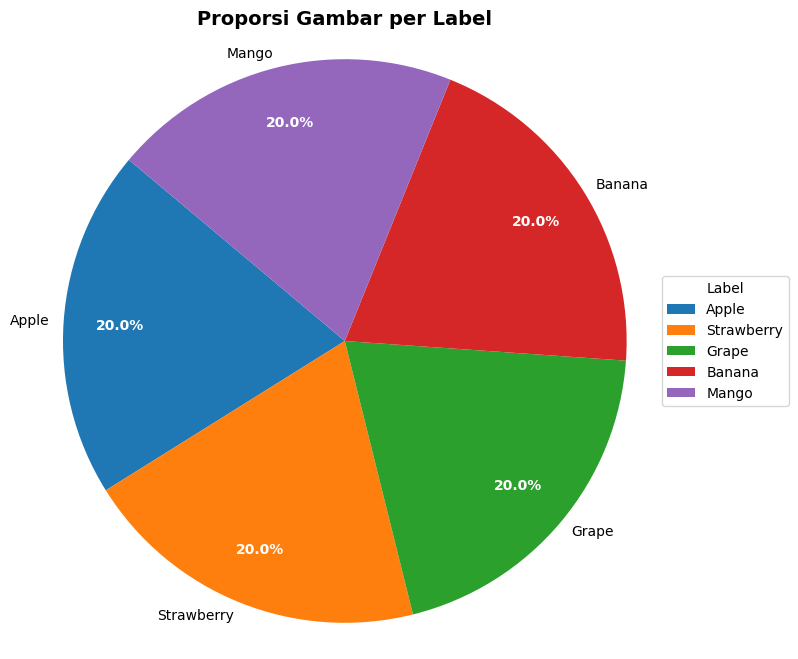

In [8]:
# Sort label biar dari terbesar ke terkecil
labels = list(label_counts.keys())
sizes = list(label_counts.values())
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart dengan pengaturan jarak
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10},
    pctdistance=0.8,    # posisi angka %
    labeldistance=1.05  # posisi label
)

# Buat teks % lebih tebal dan kontras
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.axis('equal')  
plt.title('Proporsi Gambar per Label', fontsize=14, fontweight='bold')

# Tambah legend di samping (opsional kalau label panjang)
plt.legend(wedges, labels, title="Label", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

#### Resize Ukuran

In [9]:
def resize_images(input_dir, output_dir, size):
    """
    Mengubah ukuran semua gambar dalam direktori dan menyimpannya di direktori baru.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for split_dir in os.listdir(input_dir):
        split_dir_path = os.path.join(input_dir, split_dir)
        output_split_dir_path = os.path.join(output_dir, split_dir)

        if os.path.isdir(split_dir_path):
            if not os.path.exists(output_split_dir_path):
                os.makedirs(output_split_dir_path)

            for label_dir in os.listdir(split_dir_path):
                label_dir_path = os.path.join(split_dir_path, label_dir)
                output_label_dir_path = os.path.join(output_split_dir_path, label_dir)

                if os.path.isdir(label_dir_path):
                    if not os.path.exists(output_label_dir_path):
                        os.makedirs(output_label_dir_path)

                    image_files = os.listdir(label_dir_path)
                    print(f"Memproses {split_dir}/{label_dir}...")

                    for img_file in image_files:
                        img_path = os.path.join(label_dir_path, img_file)
                        output_img_path = os.path.join(output_label_dir_path, img_file)

                        try:
                            with Image.open(img_path) as img:
                                img_resized = img.resize(size)
                                img_resized.save(output_img_path)
                        except Exception as e:
                            print(f"⚠️ Gagal memproses {img_path}: {e}")

# Path di Kaggle
input_directory = ROOT_PATH 
output_directory = '/kaggle/working/fruits-resized'
target_size = (224, 224)

# Jalankan resize
resize_images(input_directory, output_directory, target_size)

# Cek hasilnya
print("\nHasil tersimpan di:", output_directory)
print("Subfolder:", os.listdir(output_directory))

Memproses valid/Apple...
Memproses valid/Strawberry...
Memproses valid/Grape...
Memproses valid/Banana...
Memproses valid/Mango...
Memproses test/Apple...
Memproses test/Strawberry...
Memproses test/Grape...
Memproses test/Banana...
Memproses test/Mango...
Memproses train/Apple...
Memproses train/Strawberry...
Memproses train/Grape...
Memproses train/Banana...
Memproses train/Mango...

Hasil tersimpan di: /kaggle/working/fruits-resized
Subfolder: ['train', 'valid', 'test']


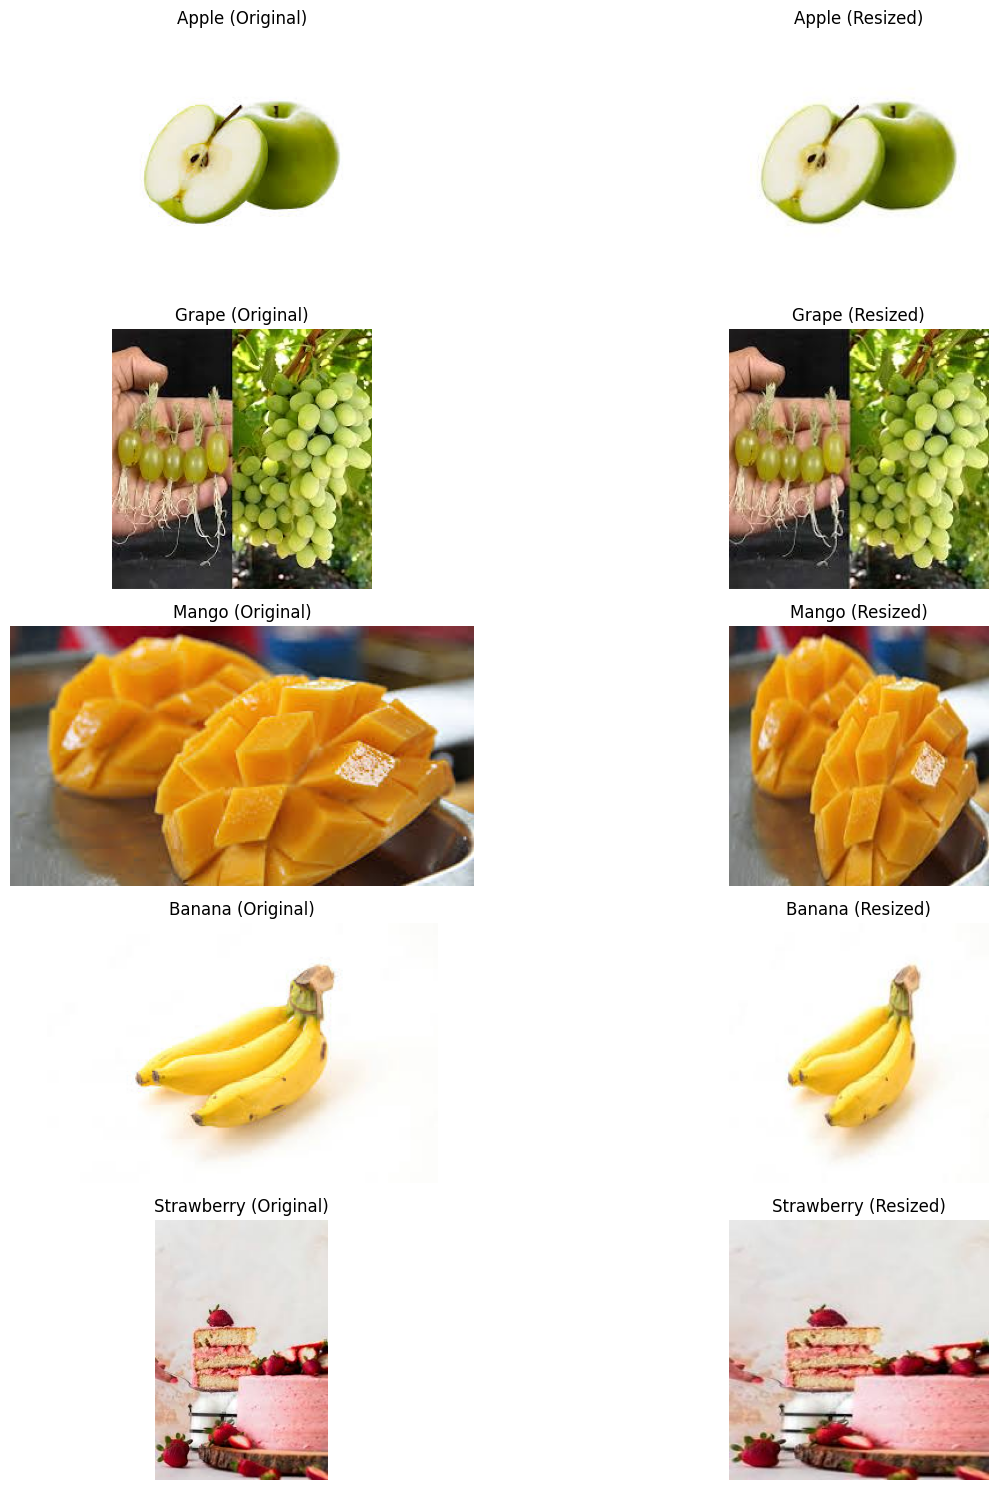

Jumlah gambar per set data setelah resize:
- train: 9700 (97.00%)
- valid: 200 (2.00%)
- test: 100 (1.00%)

Total semua gambar di semua set: 10000


In [10]:
# Direktori dataset asli (input) dan yang sudah di-resize (working)
original_dir = '/kaggle/input/fruits-classification/Fruits Classification/train'
resized_dir = '/kaggle/working/fruits-resized/train'

# Dapatkan daftar semua labels (nama sub-direktori)
labels = os.listdir(resized_dir)
labels = [label for label in labels if os.path.isdir(os.path.join(resized_dir, label))] # Filter hanya direktori

# Tentukan berapa banyak contoh gambar per label yang ingin ditampilkan
num_examples_per_label = 1

# Sesuaikan ukuran figure untuk menampilkan dua kolom (asli dan resized)
plt.figure(figsize=(15, len(labels) * 3))

for i, label in enumerate(labels):
    original_label_dir = os.path.join(original_dir, label)
    resized_label_dir = os.path.join(resized_dir, label)

    # Pastikan direktori label ada di kedua lokasi
    if not os.path.isdir(original_label_dir) or not os.path.isdir(resized_label_dir):
        print(f"⚠️ Direktori label {label} tidak ditemukan di kedua lokasi.")
        continue

    image_files = os.listdir(resized_label_dir) # Ambil nama file dari direktori resized
    # Ambil beberapa contoh gambar secara acak
    sample_images = random.sample(image_files, min(num_examples_per_label, len(image_files)))

    for j, img_file in enumerate(sample_images):
        original_img_path = os.path.join(original_label_dir, img_file)
        resized_img_path = os.path.join(resized_label_dir, img_file)

        # Tampilkan gambar asli
        try:
            img_original = Image.open(original_img_path)
            plt.subplot(len(labels), num_examples_per_label * 2, i * num_examples_per_label * 2 + j * 2 + 1)
            plt.imshow(img_original)
            plt.title(f'{label} (Original)')
            plt.axis('off')
        except Exception as e:
            print(f"⚠️ Gagal menampilkan gambar asli {original_img_path}: {e}")

        # Tampilkan gambar yang sudah di-resize
        try:
            img_resized = Image.open(resized_img_path)
            plt.subplot(len(labels), num_examples_per_label * 2, i * num_examples_per_label * 2 + j * 2 + 2)
            plt.imshow(img_resized)
            plt.title(f'{label} (Resized)')
            plt.axis('off')
        except Exception as e:
            print(f"⚠️ Gagal menampilkan gambar resized {resized_img_path}: {e}")

plt.tight_layout()
plt.show()

# Check total images after resize
data_dir = '/kaggle/working/fruits-resized' # Use the resized data directory
split_counts = {}
total_images_all_splits = 0

# Iterate through the split directories (training, validation, evaluation)
for split_dir in os.listdir(data_dir):
    split_dir_path = os.path.join(data_dir, split_dir)
    if os.path.isdir(split_dir_path):
        num_images_in_split = 0
        # Iterate through the label directories within each split directory
        for label_dir in os.listdir(split_dir_path):
            label_dir_path = os.path.join(split_dir_path, label_dir)
            if os.path.isdir(label_dir_path):
                num_images_in_split += len(os.listdir(label_dir_path))
        split_counts[split_dir] = num_images_in_split
        total_images_all_splits += num_images_in_split

print("Jumlah gambar per set data setelah resize:")
for split, count in split_counts.items():
    percentage = (count / total_images_all_splits) * 100
    print(f"- {split}: {count} ({percentage:.2f}%)")

print(f"\nTotal semua gambar di semua set: {total_images_all_splits}")

#### Split Dataset

In [11]:
data_dir = '/kaggle/working/fruits-resized' # Use the resized data directory
split_counts = {}
total_images_all_splits = 0

# Iterate through the split directories (training, validation, evaluation)
for split_dir in os.listdir(data_dir):
    split_dir_path = os.path.join(data_dir, split_dir)
    if os.path.isdir(split_dir_path):
        num_images_in_split = 0
        # Iterate through the label directories within each split directory
        for label_dir in os.listdir(split_dir_path):
            label_dir_path = os.path.join(split_dir_path, label_dir)
            if os.path.isdir(label_dir_path):
                num_images_in_split += len(os.listdir(label_dir_path))
        split_counts[split_dir] = num_images_in_split
        total_images_all_splits += num_images_in_split

print("Jumlah gambar per set data:")
for split, count in split_counts.items():
    percentage = (count / total_images_all_splits) * 100
    print(f"- {split}: {count} ({percentage:.2f}%)")

print(f"\nTotal semua gambar di semua set: {total_images_all_splits}")

Jumlah gambar per set data:
- train: 9700 (97.00%)
- valid: 200 (2.00%)
- test: 100 (1.00%)

Total semua gambar di semua set: 10000


In [12]:
src_root = '/kaggle/input/fruits-classification/Fruits Classification'
splits_to_read = ['train', 'valid', 'test']

# Folder output split ulang
out_root = '/kaggle/working/fruits-resplit'
out_splits = ['train', 'valid', 'test']

# Proporsi baru (pastikan total = 1.0)
ratio = {'train': 0.8, 'valid': 0.1, 'test': 0.1}

# Random seed untuk reproducibility
seed = 42

# Copy or move? ('copy' atau 'move')
mode = 'copy'
# ------------------------------------------

random.seed(seed)

# 1) Kumpulkan file per kelas dari semua split yang ada
class_files = defaultdict(list)
for split in splits_to_read:
    split_path = os.path.join(src_root, split)
    if not os.path.isdir(split_path):
        print(f"⚠️ Sumber split tidak ditemukan: {split_path} (dilewati)")
        continue
    for classname in os.listdir(split_path):
        class_dir = os.path.join(split_path, classname)
        if not os.path.isdir(class_dir):
            continue
        for fname in os.listdir(class_dir):
            # optional: filter by image extension
            if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                class_files[classname].append(os.path.join(class_dir, fname))

# 2) Buat folder output
for s in out_splits:
    for classname in class_files.keys():
        target_dir = os.path.join(out_root, s, classname)
        os.makedirs(target_dir, exist_ok=True)

# 3) Untuk tiap kelas: shuffle list, lalu split sesuai ratio
summary = {}
for classname, files in class_files.items():
    files = list(files)
    random.shuffle(files)
    n = len(files)
    n_train = int(floor(n * ratio['train']))
    n_valid = int(floor(n * ratio['valid']))
    # remaining to test (to avoid rounding loss)
    n_test = n - n_train - n_valid

    train_files = files[:n_train]
    valid_files = files[n_train:n_train + n_valid]
    test_files = files[n_train + n_valid:]

    # Copy or move files
    for fpath in train_files:
        dest = os.path.join(out_root, 'train', classname, os.path.basename(fpath))
        if mode == 'copy':
            shutil.copy2(fpath, dest)
        else:
            shutil.move(fpath, dest)
    for fpath in valid_files:
        dest = os.path.join(out_root, 'valid', classname, os.path.basename(fpath))
        if mode == 'copy':
            shutil.copy2(fpath, dest)
        else:
            shutil.move(fpath, dest)
    for fpath in test_files:
        dest = os.path.join(out_root, 'test', classname, os.path.basename(fpath))
        if mode == 'copy':
            shutil.copy2(fpath, dest)
        else:
            shutil.move(fpath, dest)

    summary[classname] = {
        'total': n,
        'train': len(train_files),
        'valid': len(valid_files),
        'test': len(test_files)
    }

# 4) Print summary per class and global
total_all = 0
print("Summary split per class:")
for classname, s in summary.items():
    total_all += s['total']
    print(f"- {classname}: total={s['total']}, train={s['train']}, valid={s['valid']}, test={s['test']}")

print("\nTotal across all classes:", total_all)

# 5) Quick check totals
totals = {'train':0, 'valid':0, 'test':0}
for split in out_splits:
    split_path = os.path.join(out_root, split)
    for classname in os.listdir(split_path):
        class_dir = os.path.join(split_path, classname)
        if os.path.isdir(class_dir):
            totals[split] += len(os.listdir(class_dir))
print("\nTotals after split:")
for k,v in totals.items():
    print(f"- {k}: {v} ({v/total_all*100:.2f}%)")

Summary split per class:
- Apple: total=2000, train=1600, valid=200, test=200
- Strawberry: total=2000, train=1600, valid=200, test=200
- Grape: total=2000, train=1600, valid=200, test=200
- Banana: total=2000, train=1600, valid=200, test=200
- Mango: total=2000, train=1600, valid=200, test=200

Total across all classes: 10000

Totals after split:
- train: 8000 (80.00%)
- valid: 1000 (10.00%)
- test: 1000 (10.00%)


#### Normalisasi Data

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan path untuk training, validation, dan evaluation data
train_dir = '/kaggle/working/fruits-resplit/train'
validation_dir = '/kaggle/working/fruits-resplit/valid'
evaluation_dir = '/kaggle/working/fruits-resplit/test'

# Definisikan parameter untuk generator
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Buat instance ImageDataGenerator untuk normalisasi
# Rescale 1./255 akan menskalakan nilai piksel dari [0, 255] menjadi [0, 1]
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,          
    width_shift_range=0.2,      
    height_shift_range=0.2,     
    shear_range=0.2,            
    zoom_range=0.3,             
    horizontal_flip=True,       
    brightness_range=[0.7, 1.3],
    fill_mode='reflect',
    channel_shift_range=0.1
)

# Validation dan evaluation hanya menggunakan normalisasi (tidak ada augmentasi)
validation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator untuk data training, validation, dan evaluation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Karena ini adalah klasifikasi multikelas
    shuffle=True,              # Acak urutan data saat pelatihan
    seed=42                    # Untuk reproduktifitas
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,             # Tidak diacak untuk evaluasi yang konsisten
    seed=42
)

evaluation_generator = evaluation_datagen.flow_from_directory(
    evaluation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nNormalisasi data selesai dan generator telah dibuat.")
print(f"Jumlah kelas: {train_generator.num_classes}")
print(f"Jumlah batch training: {len(train_generator)}")
print(f"Jumlah batch validation: {len(validation_generator)}")
print(f"Jumlah batch evaluation: {len(evaluation_generator)}")

Found 8000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.

Normalisasi data selesai dan generator telah dibuat.
Jumlah kelas: 5
Jumlah batch training: 250
Jumlah batch validation: 32
Jumlah batch evaluation: 32


In [14]:
# Menampilkan informasi tentang kelas
class_labels = list(train_generator.class_indices.keys())
print(f"Kelas yang tersedia: {class_labels}")

Kelas yang tersedia: ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


In [15]:
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")

Number of classes: 5


## Modeling

### Phase 1

In [16]:
base_model = EfficientNetV2S(weights='imagenet', include_top=False,
                           input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

I0000 00:00:1759140559.295029      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759140559.295749      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 7, 7, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,181,733 (84.62 MB)

 Trainable params: 1,844,741 (7.04 MB)

 Non-trainable params: 20,336,992 (77.58 MB)

In [18]:
callbacks_phase1 = [
    ModelCheckpoint('best_efficientnet_model.keras',
                   monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=15,
                 restore_best_weights=True, min_delta=0.001),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-7)
]

In [19]:
history1 = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=callbacks_phase1,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


I0000 00:00:1759140599.541232      94 service.cc:148] XLA service 0x7e1284026880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759140599.542690      94 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759140599.542729      94 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759140603.516063      94 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/250 ━━━━━━━━━━━━━━━━━━━━ 4:08:20 60s/step - accuracy: 0.2188 - loss: 14.1719

I0000 00:00:1759140625.113469      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.2361 - loss: 10.9400
Epoch 1: val_accuracy improved from -inf to 0.19900, saving model to best_efficientnet_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 182s 490ms/step - accuracy: 0.2361 - loss: 10.9281 - val_accuracy: 0.1990 - val_loss: 3.3514 - learning_rate: 0.0010
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.2440 - loss: 3.0349
Epoch 2: val_accuracy improved from 0.19900 to 0.27100, saving model to best_efficientnet_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 418ms/step - accuracy: 0.2441 - loss: 3.0333 - val_accuracy: 0.2710 - val_loss: 1.9758 - learning_rate: 0.0010
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.2638 - loss: 2.0770
Epoch 3: val_accuracy improved from 0.27100 to 0.31900, saving model to best_efficientnet_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 422ms/step - accuracy: 0.2638 - loss: 2.0769 - val_accuracy: 0.3190 - val_loss: 1.8425 - learning_rate: 0.0010
Epoch 4

### Phase 2

In [20]:
base_model.trainable = True

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
callbacks_phase2 = [
    ModelCheckpoint('best_efficientnet_finetuned.keras',
                   monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=10,
                 restore_best_weights=True, min_delta=0.0005),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-8)
]

In [22]:
history2 = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks_phase2,
    verbose=1
)

Epoch 1/30


E0000 00:00:1759144940.285499      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1759144940.426939      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1759144940.843278      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1759144940.989529      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6191 - loss: 1.0893
Epoch 1: val_accuracy improved from -inf to 0.90200, saving model to best_efficientnet_finetuned.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 309s 498ms/step - accuracy: 0.6196 - loss: 1.0881 - val_accuracy: 0.9020 - val_loss: 0.3766 - learning_rate: 1.0000e-04
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8826 - loss: 0.4291
Epoch 2: val_accuracy improved from 0.90200 to 0.93400, saving model to best_efficientnet_finetuned.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 454ms/step - accuracy: 0.8827 - loss: 0.4291 - val_accuracy: 0.9340 - val_loss: 0.2654 - learning_rate: 1.0000e-04
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9101 - loss: 0.3299
Epoch 3: val_accuracy improved from 0.93400 to 0.93700, saving model to best_efficientnet_finetuned.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 113s 450ms/step - accuracy: 0.9101 - loss: 0.3299 - val_accuracy: 0.9370 - val_loss: 0.2369 - learning_ra

### Phase 3

In [23]:
# Coba strategi gradual unfreezing dulu
base_model.trainable = True

# Freeze semua kecuali 15 layer terakhir
for layer in base_model.layers[:-15]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=2e-5),  # Lebih kecil
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
callbacks = [
    ModelCheckpoint('best_model_gradual.keras',
                   monitor='val_accuracy', save_best_only=True),
    EarlyStopping(monitor='val_accuracy', patience=8,
                 restore_best_weights=True, min_delta=0.0001),
    ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                     patience=3, min_lr=1e-8)
]

In [25]:
history3 = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 182s 482ms/step - accuracy: 0.9953 - loss: 0.0287 - val_accuracy: 0.9650 - val_loss: 0.1753 - learning_rate: 2.0000e-05
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 421ms/step - accuracy: 0.9978 - loss: 0.0220 - val_accuracy: 0.9620 - val_loss: 0.1815 - learning_rate: 2.0000e-05
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 416ms/step - accuracy: 0.9955 - loss: 0.0258 - val_accuracy: 0.9650 - val_loss: 0.1824 - learning_rate: 2.0000e-05
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 420ms/step - accuracy: 0.9964 - loss: 0.0251 - val_accuracy: 0.9640 - val_loss: 0.1763 - learning_rate: 2.0000e-05
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 417ms/step - accuracy: 0.9962 - loss: 0.0228 - val_accuracy: 0.9650 - val_loss: 0.1784 - learning_rate: 1.4000e-05
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 419ms/step - accuracy: 0.9976 - loss: 0.0196 - val_accuracy: 0.9620 - val_loss: 0.1800 - learning_rate: 1.4000e-05
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 

### Phase 4

In [26]:
best_model = load_model('best_model_gradual.keras')

# Unfreeze untuk fine-tuning lagi
for layer in best_model.layers:
    layer.trainable = True

class_weights = {
    0: 2.5,  # Apple
    1: 1.0,  # Banana
    2: 1.0,  # Grape
    3: 1.8,  # Mango
    4: 1.0   # Strawberry
}

In [27]:
# Compile dengan learning rate kecil
best_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# Training focused pada class bermasalah
callbacks = [
    ModelCheckpoint('best_model_class_weighted.keras',
                   monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5,
                 restore_best_weights=True, min_delta=0.0001),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)
]

In [29]:
history_class_weighted = best_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.9974 - loss: 0.0233
Epoch 1: val_accuracy improved from -inf to 0.96100, saving model to best_model_class_weighted.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 183s 488ms/step - accuracy: 0.9974 - loss: 0.0233 - val_accuracy: 0.9610 - val_loss: 0.1778 - learning_rate: 1.0000e-05
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9978 - loss: 0.0273
Epoch 2: val_accuracy improved from 0.96100 to 0.96200, saving model to best_model_class_weighted.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 422ms/step - accuracy: 0.9978 - loss: 0.0273 - val_accuracy: 0.9620 - val_loss: 0.1778 - learning_rate: 1.0000e-05
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9972 - loss: 0.0293
Epoch 3: val_accuracy improved from 0.96200 to 0.96400, saving model to best_model_class_weighted.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 420ms/step - accuracy: 0.9972 - loss: 0.0293 - val_accuracy: 0.9640 - val_loss: 0.1832 - learni

## Evaluasi dan Visualisasi

**Phase 1 + 2 (With Fine Tuning)**

In [30]:
train_loss, train_acc = model.evaluate(train_generator, verbose=1)
test_loss, test_acc = model.evaluate(evaluation_generator, verbose=1)

print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 406ms/step - accuracy: 0.9989 - loss: 0.0167
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9348 - loss: 0.3177
Training Accuracy: 0.9991 (99.91%)
Testing Accuracy: 0.9550 (95.50%)
Training Loss: 0.0158
Testing Loss: 0.2055


**Ensemble Model Phase 2 and 3**

In [31]:
model2 = load_model('best_efficientnet_finetuned.keras')
model3 = load_model('best_model_gradual.keras')
# Ensemble prediction
evaluation_generator.reset()
pred2 = model2.predict(evaluation_generator, verbose=1)

evaluation_generator.reset()
pred3 = model3.predict(evaluation_generator, verbose=1)

# Average predictions
ensemble_pred = (pred2 + pred3) / 2
y_pred = np.argmax(ensemble_pred, axis=1)

# True labels
evaluation_generator.reset()
y_true = evaluation_generator.classes

# Calculate accuracy
ensemble_acc = accuracy_score(y_true, y_pred)

print(f"Phase 2+3 Ensemble: {ensemble_acc:.4f} ({ensemble_acc*100:.2f}%)")

32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 454ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 494ms/step
Phase 2+3 Ensemble: 0.9530 (95.30%)


**Phase 3 (Gradual Unfreezing)**

In [32]:
best_model = load_model('best_model_gradual.keras')

In [33]:
train_loss, train_acc = best_model.evaluate(train_generator, verbose=1)
test_loss, test_acc = best_model.evaluate(evaluation_generator, verbose=1)

print(f" Final Results After Using Gradual Freezing:")
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 116s 399ms/step - accuracy: 0.9993 - loss: 0.0148
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.9348 - loss: 0.3177
 Final Results After Using Gradual Freezing:
Training Accuracy: 0.9994 (99.94%)
Testing Accuracy: 0.9550 (95.50%)
Training Loss: 0.0149
Testing Loss: 0.2055


**Phase 4 (Class Weighted)**

In [34]:
best_model = load_model('best_model_class_weighted.keras')

In [35]:
train_loss, train_acc = best_model.evaluate(train_generator, verbose=1)
test_loss, test_acc = best_model.evaluate(evaluation_generator, verbose=1)

print(f" Final Results After Using Class Weights:")
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 119s 401ms/step - accuracy: 0.9995 - loss: 0.0122
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.9329 - loss: 0.3208
 Final Results After Using Class Weights:
Training Accuracy: 0.9992 (99.92%)
Testing Accuracy: 0.9530 (95.30%)
Training Loss: 0.0134
Testing Loss: 0.2077


Training Summary:
Phase 1 (Feature Extraction): 40 epochs
Phase 2 (Full Fine-tuning): 30 epochs
Phase 3 (Gradual Unfreezing): 9 epochs
Phase 4 (Class Weights): 8 epochs
Total epochs: 87


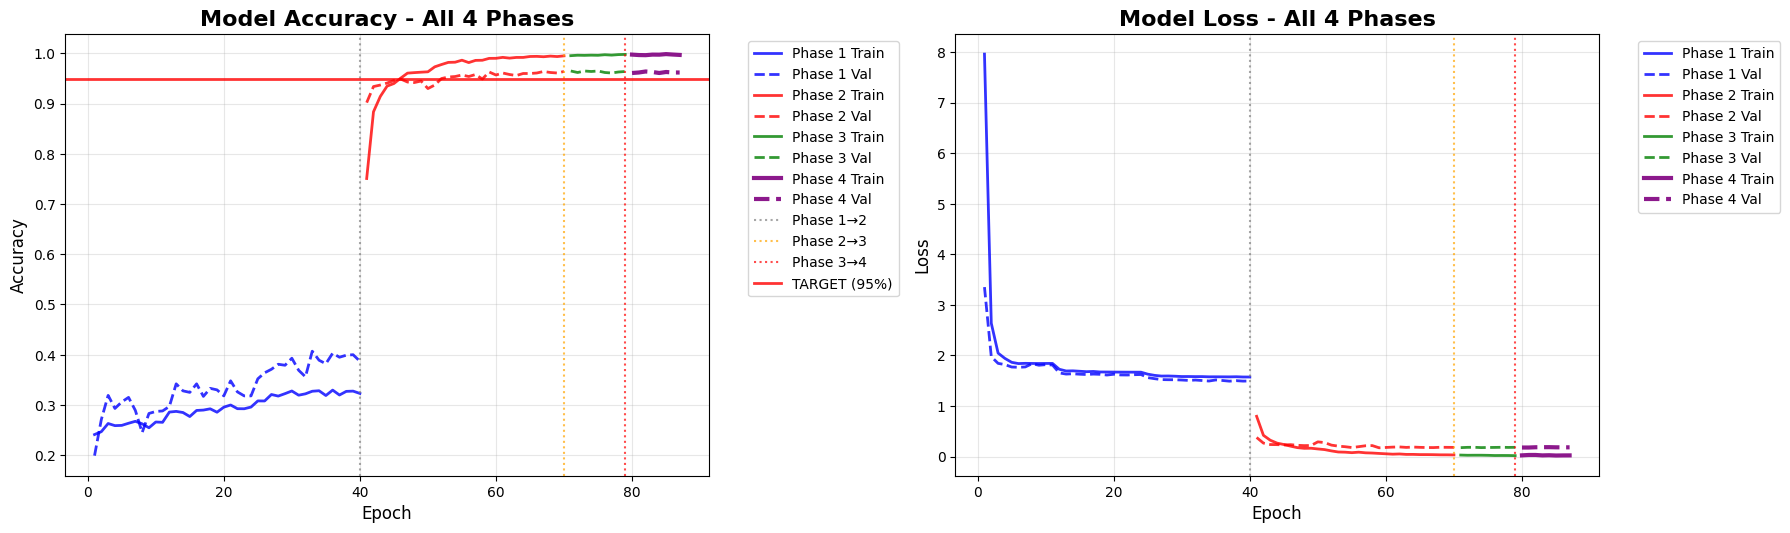

In [36]:
# Get epochs for all phases
total_epochs_phase1 = len(history1.history['loss'])
total_epochs_phase2 = len(history2.history['loss'])
total_epochs_phase3 = len(history3.history['loss'])
total_epochs_phase4 = len(history_class_weighted.history['loss'])

print(f"Training Summary:")
print(f"Phase 1 (Feature Extraction): {total_epochs_phase1} epochs")
print(f"Phase 2 (Full Fine-tuning): {total_epochs_phase2} epochs")
print(f"Phase 3 (Gradual Unfreezing): {total_epochs_phase3} epochs")
print(f"Phase 4 (Class Weights): {total_epochs_phase4} epochs")
print(f"Total epochs: {total_epochs_phase1 + total_epochs_phase2 + total_epochs_phase3 + total_epochs_phase4}")

# Calculate cumulative epochs for plotting
phase1_end = total_epochs_phase1
phase2_end = phase1_end + total_epochs_phase2
phase3_end = phase2_end + total_epochs_phase3
phase4_end = phase3_end + total_epochs_phase4

# Create comprehensive plot
plt.figure(figsize=(18, 10))

# ===============================
# ACCURACY PLOT (All 4 Phases)
# ===============================
plt.subplot(2, 2, 1)

# Phase 1: Feature Extraction
plt.plot(range(1, phase1_end + 1), history1.history['accuracy'],
         'b-', label='Phase 1 Train', linewidth=2, alpha=0.8)
plt.plot(range(1, phase1_end + 1), history1.history['val_accuracy'],
         'b--', label='Phase 1 Val', linewidth=2, alpha=0.8)

# Phase 2: Full Fine-tuning
phase2_start = phase1_end + 1
plt.plot(range(phase2_start, phase2_end + 1), history2.history['accuracy'],
         'r-', label='Phase 2 Train', linewidth=2, alpha=0.8)
plt.plot(range(phase2_start, phase2_end + 1), history2.history['val_accuracy'],
         'r--', label='Phase 2 Val', linewidth=2, alpha=0.8)

# Phase 3: Gradual Unfreezing
phase3_start = phase2_end + 1
plt.plot(range(phase3_start, phase3_end + 1), history3.history['accuracy'],
         'g-', label='Phase 3 Train', linewidth=2, alpha=0.8)
plt.plot(range(phase3_start, phase3_end + 1), history3.history['val_accuracy'],
         'g--', label='Phase 3 Val', linewidth=2, alpha=0.8)

# Phase 4: Class Weights (NEW!)
phase4_start = phase3_end + 1
plt.plot(range(phase4_start, phase4_end + 1), history_class_weighted.history['accuracy'],
         'purple', label='Phase 4 Train', linewidth=3, alpha=0.9)  # Thicker for final phase
plt.plot(range(phase4_start, phase4_end + 1), history_class_weighted.history['val_accuracy'],
         'purple', linestyle='--', label='Phase 4 Val', linewidth=3, alpha=0.9)

# Phase separation lines
plt.axvline(x=phase1_end, color='gray', linestyle=':', alpha=0.7, label='Phase 1→2')
plt.axvline(x=phase2_end, color='orange', linestyle=':', alpha=0.7, label='Phase 2→3')
plt.axvline(x=phase3_end, color='red', linestyle=':', alpha=0.7, label='Phase 3→4')

# Target line
plt.axhline(y=0.95, color='red', linestyle='-', alpha=0.8, linewidth=2, label='TARGET (95%)')

plt.title('Model Accuracy - All 4 Phases', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

# ===============================
# LOSS PLOT (All 4 Phases)
# ===============================
plt.subplot(2, 2, 2)

# Phase 1
plt.plot(range(1, phase1_end + 1), history1.history['loss'],
         'b-', label='Phase 1 Train', linewidth=2, alpha=0.8)
plt.plot(range(1, phase1_end + 1), history1.history['val_loss'],
         'b--', label='Phase 1 Val', linewidth=2, alpha=0.8)

# Phase 2
plt.plot(range(phase2_start, phase2_end + 1), history2.history['loss'],
         'r-', label='Phase 2 Train', linewidth=2, alpha=0.8)
plt.plot(range(phase2_start, phase2_end + 1), history2.history['val_loss'],
         'r--', label='Phase 2 Val', linewidth=2, alpha=0.8)

# Phase 3
plt.plot(range(phase3_start, phase3_end + 1), history3.history['loss'],
         'g-', label='Phase 3 Train', linewidth=2, alpha=0.8)
plt.plot(range(phase3_start, phase3_end + 1), history3.history['val_loss'],
         'g--', label='Phase 3 Val', linewidth=2, alpha=0.8)

# Phase 4: Class Weights
plt.plot(range(phase4_start, phase4_end + 1), history_class_weighted.history['loss'],
         'purple', label='Phase 4 Train', linewidth=3, alpha=0.9)
plt.plot(range(phase4_start, phase4_end + 1), history_class_weighted.history['val_loss'],
         'purple', linestyle='--', label='Phase 4 Val', linewidth=3, alpha=0.9)

# Phase separation lines
plt.axvline(x=phase1_end, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=phase2_end, color='orange', linestyle=':', alpha=0.7)
plt.axvline(x=phase3_end, color='red', linestyle=':', alpha=0.7)

plt.title('Model Loss - All 4 Phases', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Konversi Model

In [37]:
# Menampilkan class_indices mapping
class_labels = list(train_generator.class_indices.keys())
print(f"Kelas yang tersedia: {class_labels}")
print(f"Total kelas: {len(class_labels)}")

print(f"\nClass indices mapping:")
for class_name, index in train_generator.class_indices.items():
    print(f"  {index}: {class_name}")

# Buat class_names dengan urutan yang benar (berdasarkan index)
class_names = [None] * train_generator.num_classes
for class_name, index in train_generator.class_indices.items():
    class_names[index] = class_name

print(f"\nFinal class_names (ordered by index):")
for i, name in enumerate(class_names):
    print(f"  Index {i}: {name}")

print(f"\n🎯 Class names for export: {class_names}")

Kelas yang tersedia: ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']
Total kelas: 5

Class indices mapping:
  0: Apple
  1: Banana
  2: Grape
  3: Mango
  4: Strawberry

Final class_names (ordered by index):
  Index 0: Apple
  Index 1: Banana
  Index 2: Grape
  Index 3: Mango
  Index 4: Strawberry

🎯 Class names for export: ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


In [38]:
def save_model_submission_format(model, class_names, submission_folder="submission"):
    """
    Save model dalam 3 format: saved_model, tflite, dan tfjs_model
    TIDAK membuat README.md dan requirements.txt (buat manual)
    """

    print("🚀 SAVING MODEL IN SUBMISSION FORMAT...")
    print("="*50)

    # Create main submission folder
    os.makedirs(submission_folder, exist_ok=True)

    # Helper function untuk menghitung ukuran folder
    def get_folder_size(folder_path):
        total_size = 0
        for dirpath, dirnames, filenames in os.walk(folder_path):
            for f in filenames:
                fp = os.path.join(dirpath, f)
                if os.path.exists(fp):
                    total_size += os.path.getsize(fp)
        return total_size / (1024 * 1024)  # Convert to MB

    # 1. SAVED_MODEL FOLDER
    print("1️⃣ Creating saved_model folder...")
    saved_model_path = os.path.join(submission_folder, "saved_model")

    try:
        if hasattr(model, 'export'):
            model.export(saved_model_path)
        else:
            tf.saved_model.save(model, saved_model_path)

        saved_model_size = get_folder_size(saved_model_path)
        print(f"✅ SavedModel saved to: saved_model/")
        print(f"   Size: {saved_model_size:.2f} MB")

    except Exception as e:
        print(f"❌ Error saving SavedModel: {e}")

    # 2. TFLITE FOLDER
    print("\n2️⃣ Creating tflite folder...")
    tflite_folder = os.path.join(submission_folder, "tflite")
    os.makedirs(tflite_folder, exist_ok=True)

    try:
        # Convert to TFLite
        converter = tf.lite.TFLiteConverter.from_keras_model(model)
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        tflite_model = converter.convert()

        # Save model.tflite
        tflite_path = os.path.join(tflite_folder, "model.tflite")
        with open(tflite_path, 'wb') as f:
            f.write(tflite_model)

        # Save label.txt
        label_path = os.path.join(tflite_folder, "label.txt")
        with open(label_path, 'w') as f:
            for class_name in class_names:
                f.write(f"{class_name}\n")

        tflite_size = os.path.getsize(tflite_path) / (1024 * 1024)
        print(f"✅ model.tflite saved (Size: {tflite_size:.2f} MB)")
        print(f"✅ label.txt saved with {len(class_names)} classes")

    except Exception as e:
        print(f"❌ Error creating TFLite: {e}")

    # 3. TFJS_MODEL FOLDER
    print("\n3️⃣ Creating tfjs_model folder...")
    tfjs_folder = os.path.join(submission_folder, "tfjs_model")

    try:
        tfjs.converters.save_keras_model(model, tfjs_folder)

        tfjs_size = get_folder_size(tfjs_folder)
        print(f"✅ TensorFlow.js model saved (Size: {tfjs_size:.2f} MB)")

    except ImportError:
        print("❌ TensorFlow.js not installed")
        print("   Install with: pip install tensorflowjs")
    except Exception as e:
        print(f"❌ Error creating TFJS model: {e}")

    # SUMMARY
    print(f"\n🎯 MODEL EXPORT COMPLETED!")
    print(f"📁 Submission folder: {submission_folder}/")
    print(f"📊 Classes: {class_names}")

    print(f"\n📝 MANUAL STEPS:")
    print(f"1. Copy notebook.ipynb ke folder {submission_folder}/")
    print(f"2. Buat README.md secara manual")
    print(f"3. Buat requirements.txt secara manual")

    return submission_folder

In [39]:
submission_folder = save_model_submission_format(model, class_names, "submission")

🚀 SAVING MODEL IN SUBMISSION FORMAT...
1️⃣ Creating saved_model folder...
Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_513')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138621250524880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250526608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250525264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250526416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250525072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250525456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250526992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250525840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138621250527376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

W0000 00:00:1759150840.660566      19 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1759150840.660609      19 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1759150841.034047      19 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


✅ model.tflite saved (Size: 22.72 MB)
✅ label.txt saved with 5 classes

3️⃣ Creating tfjs_model folder...
failed to lookup keras version from the file,
    this is likely a weight only file
✅ TensorFlow.js model saved (Size: 85.08 MB)

🎯 MODEL EXPORT COMPLETED!
📁 Submission folder: submission/
📊 Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

📝 MANUAL STEPS:
1. Copy notebook.ipynb ke folder submission/
2. Buat README.md secara manual
3. Buat requirements.txt secara manual


In [40]:
# Compress submission folder jadi submission.zip
!zip -r submission.zip submission

  adding: submission/ (stored 0%)
  adding: submission/tflite/ (stored 0%)
  adding: submission/tflite/model.tflite (deflated 14%)
  adding: submission/tflite/label.txt (stored 0%)
  adding: submission/tfjs_model/ (stored 0%)
  adding: submission/tfjs_model/group1-shard22of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard16of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard9of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard4of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard2of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard6of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard19of22.bin (deflated 7%)
  adding: submission/tfjs_model/model.json (deflated 97%)
  adding: submission/tfjs_model/group1-shard11of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard12of22.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard14of22.bin (deflated 7%)
  adding: submission/tfjs_mode

## Inference (Optional)

In [41]:
# Load interpreter sekali saja
interpreter = tf.lite.Interpreter(model_path="submission/tflite/model.tflite")
interpreter.allocate_tensors()

# Ambil detail input & output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Dapatkan ukuran input (misalnya [1, 224, 224, 3])
input_shape = input_details[0]['shape']
target_size = (input_shape[1], input_shape[2])  # (224,224)

def preprocess_image(image, target_size=target_size):
    img = image.convert("RGB").resize(target_size)
    img = np.array(img, dtype=np.float32) / 255.0
    img = np.expand_dims(img, axis=0)  # tambah batch dim
    return img

def predict_with_tflite(image, show_image=False, top_k=5):
    # Preprocess
    input_data = preprocess_image(image)

    # Set tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get prediction
    preds = interpreter.get_tensor(output_details[0]['index'])[0]

    # Convert ke (class, confidence)
    results = list(zip(class_names, preds))
    results.sort(key=lambda x: x[1], reverse=True)

    if show_image:
        display(image)

    return results[:top_k]

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [42]:
# Create upload widget
upload_widget = widgets.FileUpload(
    accept='image/*',
    multiple=True,
    description='📤 Upload'
)

output_area = widgets.Output()

def process_uploaded_images(change):
    """
    Process uploaded images
    """
    with output_area:
        output_area.clear_output()
        
        # FIX: Handle both tuple and dict formats
        uploaded_files = change['new']
        
        if not uploaded_files:
            print("⚠️ No files uploaded")
            return
        
        # Convert to dict if it's tuple
        if isinstance(uploaded_files, tuple):
            uploaded_files = {f['name']: f for f in uploaded_files}
        
        print(f"📸 Processing {len(uploaded_files)} image(s)...\n")
        
        for filename, file_data in uploaded_files.items():
            print(f"\n{'='*60}")
            print(f"🔍 Analyzing: {filename}")
            print(f"{'='*60}")
            
            try:
                # Load image - handle different data structures
                if isinstance(file_data, dict):
                    image_bytes = file_data['content']
                else:
                    image_bytes = file_data.content
                
                image = Image.open(io.BytesIO(image_bytes))
                
                # Predict
                predictions = predict_with_tflite(image, show_image=True, top_k=5)
                
                # Analysis
                top = predictions[0]
                conf = top[1]
                
                if conf > 0.8:
                    level = "High ✅"
                    assess = "Reliable prediction"
                elif conf > 0.6:
                    level = "Medium ⚠️"
                    assess = "Moderate confidence"
                else:
                    level = "Low ❌"
                    assess = "Uncertain - verify manually"
                
                print(f"\n📊 Summary:")
                print(f"├─ Result: {top[0]}")
                print(f"├─ Confidence: {conf*100:.1f}%")
                print(f"├─ Level: {level}")
                print(f"└─ Status: {assess}")
                                
            except Exception as e:
                print(f"❌ Error: {str(e)}")
                print(f"   Make sure it's a valid image file\n")

In [43]:
upload_widget.observe(process_uploaded_images, names='value')

print("📤 Upload your fruit images below:")
display(upload_widget)
display(output_area)

📤 Upload your fruit images below:


FileUpload(value=(), accept='image/*', description='📤 Upload', multiple=True)

Output()